## Welcome!

### Some Google Colab hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

`pygismo` is a small package, unknown to Google. Therefore, we have to install it locally inside the Notebook

In [1]:
# !pip install pygismo

# We use the development version of pygismo
from google.colab import drive
drive.mount('/content/drive/')

!pip install "/content/drive/MyDrive/Google Colab/pygismo/wheels/pygismo-23.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"

Mounted at /content/drive/
Processing ./drive/MyDrive/Google Colab/pygismo/wheels/pygismo-23.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl


Now we can import it as a package

In [2]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

For this example, we also use a file from the drive. Therefore, we mount our Google Drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Constructing a 2D basis

We use the same B-spline basis as in the previous example, with knot vectors:

$\Xi_u = \Xi_v = \{0,0,0,0.25,0.50,0.75,1,1,1\}$


In [5]:
kv_u = kv_v = gs.nurbs.gsKnotVector(np.array([0,0,0,0.25,0.50,0.75,1,1,1]),2)

In [6]:
tbasis = gs.nurbs.gsTensorBSplineBasis2(kv_u,kv_v)


# Definining a surface

Similar to defining a curve, we define a matrix of control points to construct a surface. For a basis of size $N$, the coefficient matrix is defined as an $N\times d$ matrix, with $d$ the geometric dimension. Furthermore, we initialize the coefficient matrix with $N\times d$ zeros.

Since our basis is composed of the same knot vector in both directions, the number of functions in each direction is $n=\sqrt{N}$.

In [8]:
coefs = np.zeros((tbasis.size(),3))
n = np.sqrt(tbasis.size())

Then, we define the control points in a uniformly spaced grid. We use `numpy.linspace` and `numpy.meshgrid` for this

In [9]:
x = np.linspace(0,1,int(n))
X,Y = np.meshgrid(x,x)
coefs[:,0] = X.flatten()
coefs[:,1] = Y.flatten()

Since the coefficient matrix is initialized with zeros, we modify a few coefficients to displace the points out-of-plane.

In [17]:
coefs[12,2] = -1
coefs[16,2] = 1
coefs[22,2] = -1
coefs[26,2] = 10

Having defined the coefficient matrix, we can make a tensor B-splne surface using the basis and the coefficient matrix.

In [18]:
surf = gs.nurbs.gsTensorBSpline2(tbasis,coefs)

# Plotting the 3D surface

We can use `matplotlib` to plot the surface here in python. As always, we start by creating a set of parametric points. Here, they stored in `x` and `y`, on their turn used to construct a `numpy.meshgrid`. The grid is used to create a matrix of parametric points to evaluate the surface on. The matrix stores the points as columns.

In [19]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)
XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

The surface is simply evaluated using `eval`, and the result is properly reshaped into the format of the `numpy.meshgrid`:

In [20]:
S = surf.eval(pts)
ZZ = S[2,:].reshape((N,M))

Then, we use `matplotlib` to plot the surface and its control points

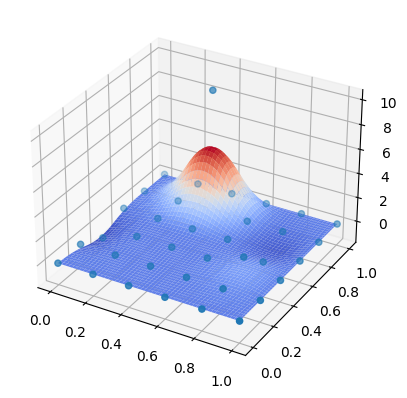

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
ax.scatter(surf.coefs()[:,0],surf.coefs()[:,1],surf.coefs()[:,2])
plt.show()

# Reading a surface from a file

As for the curve example, we can read the surface from XML.

In [22]:
filename = "/content/drive/MyDrive/Google Colab/pygismo_demo/filedata/surface_example.xml"
filedata = gs.io.gsFileData(filename)

The surface is stored with id 0 in the file. Hence, to read it into an object, we do

In [23]:
XMLsurf = gs.nurbs.gsTensorBSpline2()
filedata.getId(0,XMLsurf)

print(XMLsurf.basis().size())
print(XMLsurf.coefs())

36
[[ 0.   0.   0. ]
 [ 0.2  0.   0. ]
 [ 0.4  0.   0. ]
 [ 0.6  0.   0. ]
 [ 0.8  0.   0. ]
 [ 1.   0.   0. ]
 [ 0.   0.2  0. ]
 [ 0.2  0.2  0. ]
 [ 0.4  0.2  0. ]
 [ 0.6  0.2  0. ]
 [ 0.8  0.2  0. ]
 [ 1.   0.2  0. ]
 [ 0.   0.4 -1. ]
 [ 0.2  0.4  0. ]
 [ 0.4  0.4  0. ]
 [ 0.6  0.4  0. ]
 [ 0.8  0.4  1. ]
 [ 1.   0.4  0. ]
 [ 0.   0.6  0. ]
 [ 0.2  0.6  0. ]
 [ 0.4  0.6  0. ]
 [ 0.6  0.6  0. ]
 [ 0.8  0.6 -1. ]
 [ 1.   0.6  0. ]
 [ 0.   0.8  0. ]
 [ 0.2  0.8  0. ]
 [ 0.4  0.8  1. ]
 [ 0.6  0.8  0. ]
 [ 0.8  0.8  0. ]
 [ 1.   0.8  0. ]
 [ 0.   1.   0. ]
 [ 0.2  1.   0. ]
 [ 0.4  1.   0. ]
 [ 0.6  1.   0. ]
 [ 0.8  1.   0. ]
 [ 1.   1.   0. ]]


Using the same plotting commands as before, we can plot the result

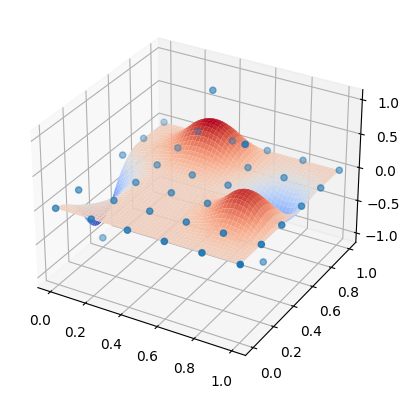

In [25]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)
XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

S = XMLsurf.eval(pts)
ZZ = S[2,:].reshape((N,M))

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
ax.scatter(XMLsurf.coefs()[:,0],XMLsurf.coefs()[:,1],XMLsurf.coefs()[:,2])
plt.show()

# Plotting the result in Paraview

Alternatively, we can use Paraview to plot our surface. We simply use `pygismo`'s buit-in functionality

In [28]:
### Check within python if the file exists

import os as os
os.exist("/content/drive/MyDrive/Google Colab/pygismo_demo/output/surf")

AttributeError: ignored

In [26]:
gs.io.gsWriteParaview(surf,"/content/drive/MyDrive/Google Colab/pygismo_demo/output/surf")

This creates the files `surf0.vts` and `surf.pvd`. When we open `surf.pvd` in paraview, we see the surface.